In [1]:
import pandas as pd

# Load dữ liệu
data = pd.read_csv("Mall_Customers.csv")  # hoặc sử dụng StringIO nếu từ chuỗi

# Chuyển đổi cột 'Gender' sang dạng số (Male=1, Female=0)
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Lấy các đặc trưng cần dùng
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\haidu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\haidu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\haidu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\haidu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

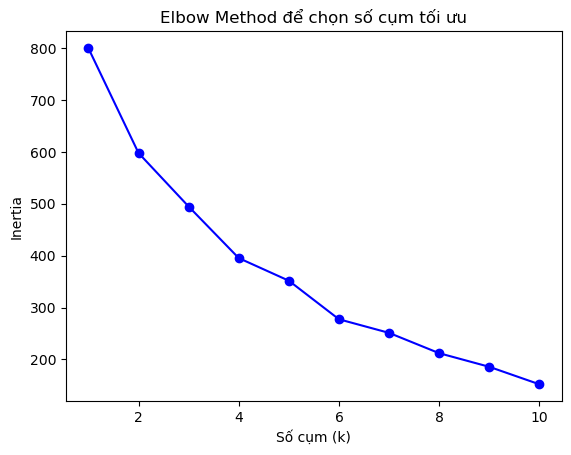

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để chọn số cụm tối ưu')
plt.show()


In [4]:
kmeans = KMeans(n_clusters=6, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


c:\Users\haidu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


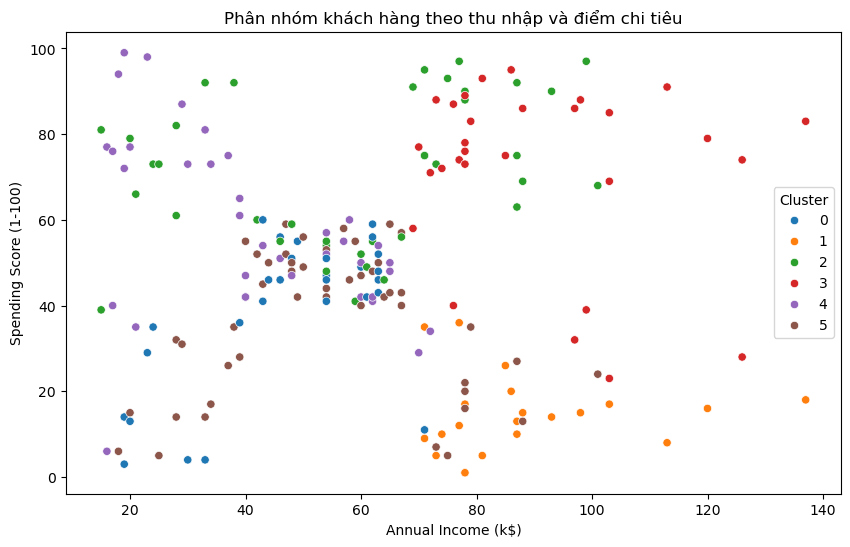

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title('Phân nhóm khách hàng theo thu nhập và điểm chi tiêu')
plt.show()


In [6]:
data.groupby('Cluster').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,67.821429,1.000000,57.214286,46.785714,38.714286
1,164.047619,0.904762,39.000000,88.333333,14.428571
2,97.820513,1.000000,28.410256,58.230769,70.717949
3,167.172414,0.068966,33.206897,91.034483,72.137931
4,56.555556,0.000000,25.888889,41.277778,57.944444
5,86.319149,0.000000,49.914894,54.255319,36.531915
